<a href="https://colab.research.google.com/github/EronDS/Neural-Networks/blob/main/CNNs/Audio/Emotions/EmotionRecognitionbyVoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wavio

In [ ]:
!pip install sklearn-deap

In [1]:
import matplotlib.pyplot as plt 
import librosa
import IPython.display as ipd
import librosa.display
import pandas as pd 
import numpy as np 
from scipy.io.wavfile import read, write
import random
import wavio
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.preprocessing import LabelEncoder
#from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EmotionRecognitionProject/csv/SpeechEmotionRecognition.csv')
df

,Speechs,Actor,Emotions,Emotions_Label,Emotion_Intensity,Statements,Repetition,Gender,GenderSyn
0,03-01-01-01-01-01-01.wav,1,01:Neutral,1,01:Normal,Kids are talking by the door,1st,2,Male
1,03-01-08-02-02-02-01.wav,1,08:Surprised,8,02:Strong,Dogs are sitting by the door,2st,2,Male
2,03-01-08-02-02-01-01.wav,1,08:Surprised,8,02:Strong,Dogs are sitting by the door,1st,2,Male
3,03-01-08-01-02-02-01.wav,1,08:Surprised,8,01:Normal,Dogs are sitting by the door,2st,2,Male
4,03-01-08-02-01-02-01.wav,1,08:Surprised,8,02:Strong,Kids are talking by the door,2st,2,Male
...,...,...,...,...,...,...,...,...,...
1435,03-01-05-02-01-02-24.wav,24,05:Angry,5,02:Strong,Kids are talking by the door,2st,1,Female
1436,03-01-05-02-01-01-24.wav,24,05:Angry,5,02:Strong,Kids are talking by the door,1st,1,Female
1437,03-01-05-01-02-02-24.wav,24,05:Angry,5,01:Normal,Dogs are sitting by the door,2st,1,Female
1438,03-01-05-01-01-02-24.wav,24,05:Angry,5,01:Normal,Kids are talking by the door,2st,1,Female


In [ ]:
path = ['/content/drive/MyDrive/Data/Speech_AllinOne/{}'.format(i)for i in df.Speechs]
path

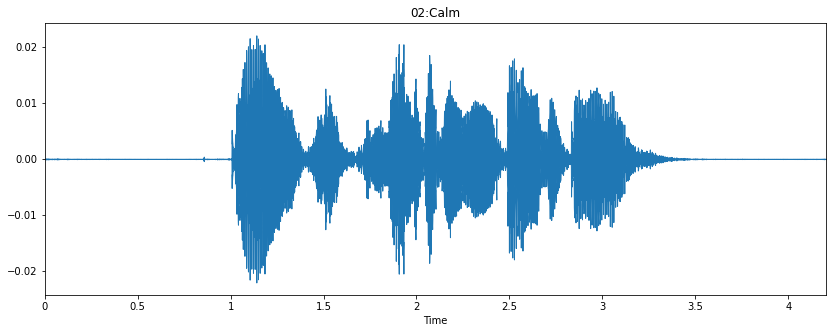

In [4]:

plt.figure(figsize=(14,5))
data,sample_r= librosa.load(path[50]) 
librosa.display.waveplot(data, sr = sample_r)
plt.title(str(df.Emotions[50]))
ipd.Audio(path[50])

In [5]:
arrays = [] 
interval = [0,100, 250,500,750,1000,1250,1440]

for i in range(len(df.Emotions)):
  data,sampling_rate = librosa.load(path[i], res_type='kaiser_fast')
  mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate,n_mfcc=40).T, axis=0)
  arrays.append(mfccs)
  if i in interval :
    u = i + 1
    print('\nProcess: {}'.format(str(round(u / len(df.Emotions)* 100)) + '%'))
  


Process: 0%

Process: 7%

Process: 17%

Process: 35%

Process: 52%

Process: 70%

Process: 87%


In [6]:
arrays[1].shape

(40,)

In [7]:
arrays = np.asarray(arrays)

In [8]:
arrays

array([[-7.0039893e+02,  5.8630211e+01, -3.0258520e+00, ...,
        -2.4810591e+00, -2.7910225e+00, -2.2448654e+00],
       [-5.7620599e+02,  5.0878246e+01, -9.5525532e+00, ...,
         1.2447872e+00,  4.0555814e-01,  4.9524555e-01],
       [-5.9574634e+02,  4.9765644e+01, -8.9585304e+00, ...,
        -5.5215800e-01, -6.8158144e-01,  8.7530893e-01],
       ...,
       [-4.9768820e+02,  3.8900562e+01, -2.2853317e+01, ...,
        -5.2290815e-01, -1.3921224e+00, -2.9182210e+00],
       [-5.1277301e+02,  3.4301071e+01, -2.2062870e+01, ...,
        -2.9479678e+00, -1.2058390e+00,  4.9673247e-01],
       [-5.3113080e+02,  3.6173141e+01, -1.8913210e+01, ...,
        -2.7625306e+00, -1.0952746e+00,  1.8794690e+00]], dtype=float32)

In [9]:
df.dtypes

Speechs              object
Actor                 int64
Emotions             object
Emotions_Label        int64
Emotion_Intensity    object
Statements           object
Repetition           object
Gender                int64
GenderSyn            object
dtype: object

In [10]:

lc = LabelEncoder()
target = lc.fit_transform(df['Emotions'])
X_train, X_test, y_train, y_test = train_test_split(arrays, target, test_size = .25)

In [11]:
def Train_Test(X_train,X_test):
  print('Train and Test sizes:{} , {}'.format(X_train.shape , X_test.shape))
Train_Test(X_train, X_test)

Train and Test sizes:(1080, 40) , (360, 40)


In [12]:
X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

###Building and Training Neural Network

In [13]:
from keras.layers import Dense,Flatten,Conv1D,Dropout, MaxPool1D, Activation
from keras.models import Model,Sequential
from keras.optimizers import Adam,RMSprop
from keras.callbacks import ReduceLROnPlateau


In [14]:
X_train[1].shape

(40, 1)

In [15]:
model = Sequential()
model.add(Conv1D(32, 5,strides = 1,  padding='same',
                         input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 32)            192       
_________________________________________________________________
activation (Activation)      (None, 40, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                20496     
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
Total params: 20,688
Trainable params: 20,688
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(optimizer= RMSprop(), loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

callback = ReduceLROnPlateau(patience = 10)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs= 150,
          batch_size = 16, )

Epoch 1/150
68/68 [==============================] - 43s 10ms/step - loss: 14.5670 - accuracy: 0.1116 - val_loss: 4.8483 - val_accuracy: 0.2194
Epoch 2/150
68/68 [==============================] - 0s 3ms/step - loss: 7.2075 - accuracy: 0.1807 - val_loss: 4.1805 - val_accuracy: 0.2139
Epoch 3/150
68/68 [==============================] - 0s 3ms/step - loss: 4.1849 - accuracy: 0.2698 - val_loss: 2.2314 - val_accuracy: 0.3083
Epoch 4/150
68/68 [==============================] - 0s 3ms/step - loss: 3.0800 - accuracy: 0.2817 - val_loss: 2.2391 - val_accuracy: 0.2917
Epoch 5/150
68/68 [==============================] - 0s 3ms/step - loss: 2.1954 - accuracy: 0.3496 - val_loss: 2.0930 - val_accuracy: 0.3389
Epoch 6/150
68/68 [==============================] - 0s 3ms/step - loss: 1.8594 - accuracy: 0.3571 - val_loss: 1.9028 - val_accuracy: 0.3111
Epoch 7/150
68/68 [==============================] - 0s 3ms/step - loss: 1.7525 - accuracy: 0.3572 - val_loss: 1.6100 - val_accuracy: 0.3694
Epoch 8/15

In [19]:
model.save('emotion.h5')

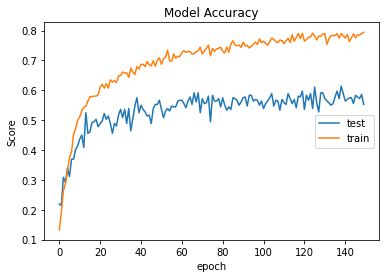

In [26]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Score')
plt.legend(['test' , 'train'] , loc = 'right')

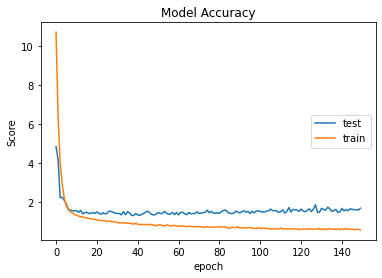

In [27]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Score')
plt.legend(['test' , 'train'] , loc = 'right')

In [22]:
def Try(u):
  arrays = []
  for i in range(u + 20):
    z = u
    data,sampling_rate = librosa.load(path[z], res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate,n_mfcc=40).T, axis=0)
    arrays.append(mfccs)
    z += 1
  
  arrays = np.asarray(arrays)
  x = np.expand_dims(arrays, axis = 2)
  labels = lc.inverse_transform(model.predict_classes(x))



  plt.figure(figsize=(14,5))
  data,sample_r= librosa.load(path[u]) 
  librosa.display.waveplot(data, sr = sample_r)
  plt.title('Real Emotion >> ' + str(df.Emotions[u]) + '|' + '  Model Prediction >>>>> ' + labels[0], fontsize = 16 )
  return(ipd.Audio(path[u]))



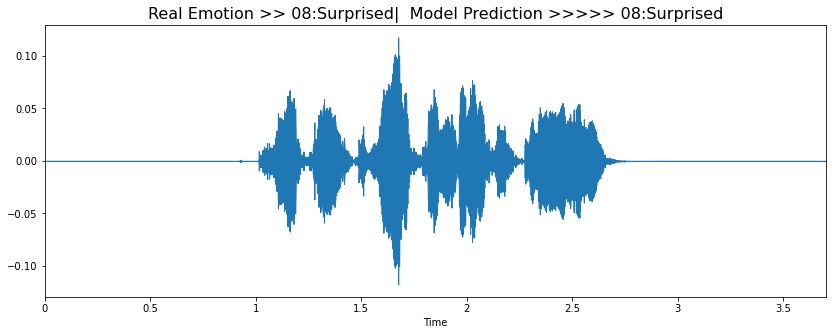

In [23]:
Try(800)

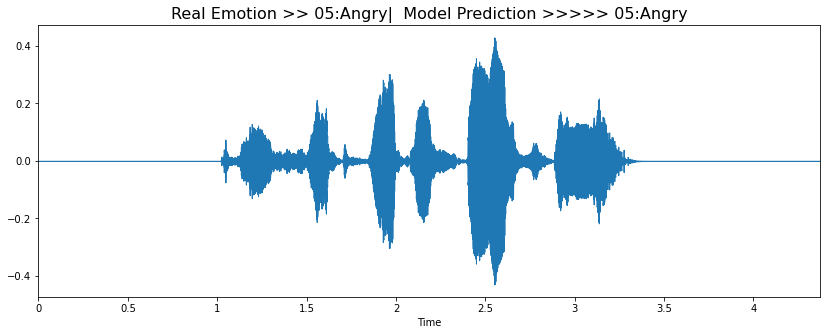

In [24]:
Try(1435) #800

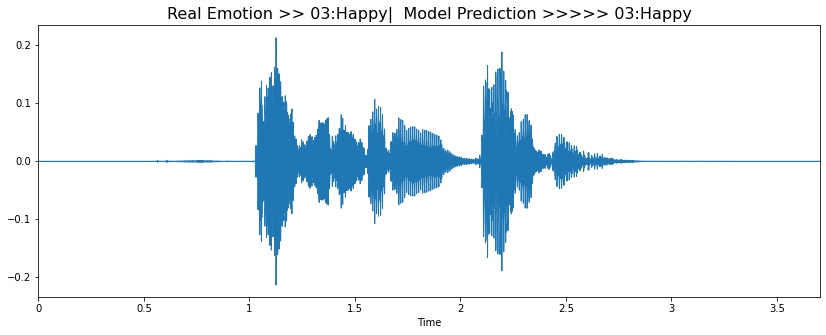

In [29]:

Try(1250)